In [1]:
import numpy as np
import matplotlib.pylab as plt
# import pandas as pd
import io
import requests
from csdl import csdl

%matplotlib inline

In [2]:
def fill(data):
    for d in data:
        gain, url = d[:2]
        s = requests.get(url).content
        c = [int(i) for i in s.decode("utf8").splitlines()[21:-1]]
        d.append(np.array(c)*(10./gain)/(1<<15))

In [206]:
noise = [
    [1, "https://github.com/m-labs/sinara/files/1317681/no_signal.x1.txt"],
    [10, "https://github.com/m-labs/sinara/files/1317684/no_signal.x10.txt"],
    [100, "https://github.com/m-labs/sinara/files/1317683/no_signal.x100.txt"],
    [1000, "https://github.com/m-labs/sinara/files/1317682/no_signal.x1000.txt"],
]
fill(noise)

gain | LSB RMS | µV RMS | nV/rtHz
1 | 0.3 | 104 | 293
10 | 0.4 | 11 | 32
100 | 1.6 | 5 | 14
1000 | 9.4 | 3 | 8


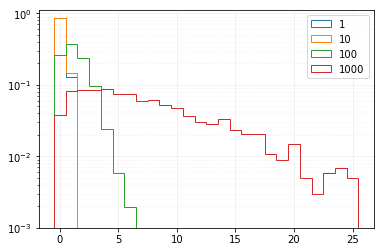

In [272]:
fig, ax = plt.subplots()
ax.grid(True, "major", linestyle="-", alpha=.2)
ax.grid(True, "minor", linestyle=":", alpha=.2)
#ax.set_xscale("log")
ax.set_yscale("log")
print("gain | LSB RMS | µV RMS | nV/rtHz")
for d in noise:
    g, u, c = d
    d = c/(10/g)*(1<<15)
    d = d - np.mean(d)
    print("{:1} | {:.1f} | {:.0f} | {:.0f}".format(g, np.std(d), np.std(c)/1e-6, np.std(c)/125e3**.5/1e-9))
    ax.hist(np.fabs(d), -.5 + np.arange(27), normed=True, histtype="step", label=str(g))
    #f, p = ax.psd(c, label=str(g), NFFT=256, Fs=1e6, scale_by_freq=True, detrend="mean")
ax.set_ylim(1e-3, 1.1)
#ax.set_xlim(1e-2, 3e4)
ax.legend(loc="best")

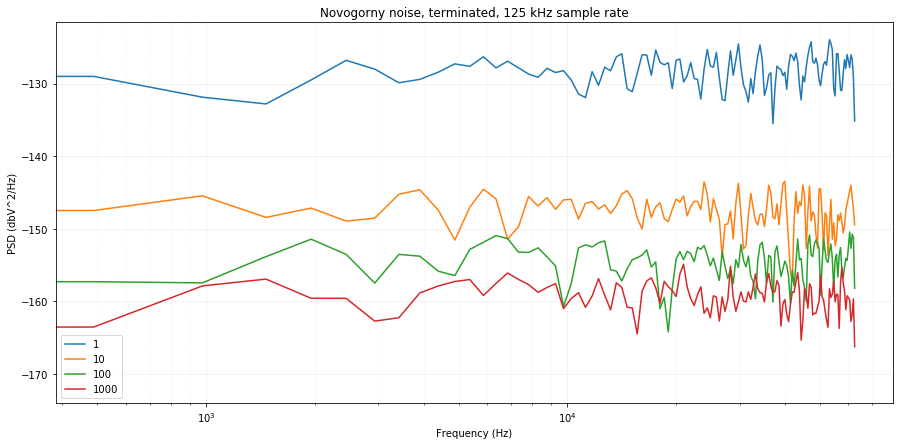

In [257]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.grid(True, "major", linestyle="-", alpha=.2)
ax.grid(True, "minor", linestyle=":", alpha=.2)
ax.set_xscale("log")
#f, p = csdl(c, c, n=128, m=1, b=10, Fs=1e6)
#ax.plot(f, 10*np.log10(p.real), linestyle="-", marker=".")
for d in noise:
    g, u, c = d
    f, p = ax.psd(c, label=str(g), NFFT=256, Fs=125e3, scale_by_freq=True, detrend="mean")
ax.legend(loc="best")
ax.set_yticks(np.arange(-170, -120, 10))
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("PSD (dbV^2/Hz)")
ax.set_title("Novogorny noise, terminated, 125 kHz sample rate")
#ax.set_xlim(1e-2, 3e4)

In [3]:
data = [
    [1000, "https://github.com/m-labs/sinara/files/1317742/100Hz.22mVpp.x1000.txt"],
    [100, "https://github.com/m-labs/sinara/files/1317744/100Hz.220mVpp.x100.txt"],
    [10, "https://github.com/m-labs/sinara/files/1317749/100Hz.2.2Vpp.x10.txt"],
    [1, "https://github.com/m-labs/sinara/files/1317752/100Hz.10Vpp.x1.txt"],
    [2, "https://github.com/m-labs/sinara/files/1317758/100Hz.20Vpp.x1.txt"],
]

data = [
#This time Fs = 200kHz, Fin=1kHz
    [1000, "https://github.com/m-labs/sinara/files/1330354/1kHz.22mVpp.x1000.txt"],
    [100, "https://github.com/m-labs/sinara/files/1330355/1kHz.220mVpp.x100.txt"],
    [10, "https://github.com/m-labs/sinara/files/1330356/1kHz.2.2Vpp.x10.txt"],
    [1, "https://github.com/m-labs/sinara/files/1330357/1kHz.10Vpp.x1.txt"],
]

fill(data)

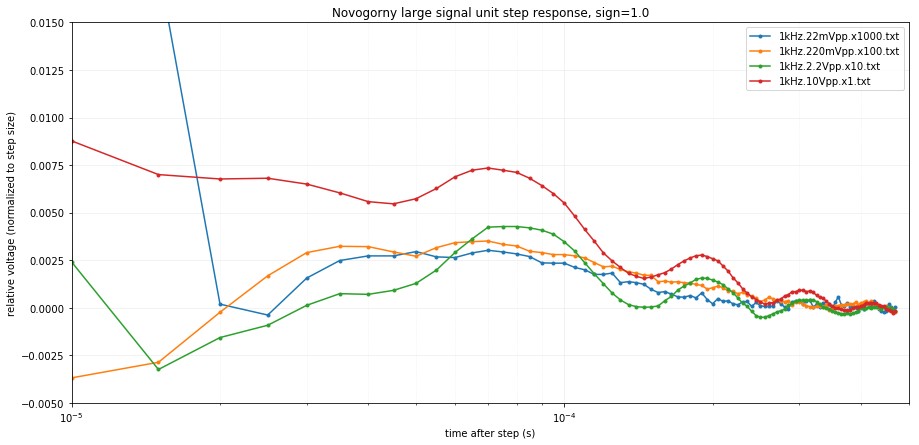

In [82]:
#offsets = [85, 27, 57 + 80, 37, 54]
offsets = [75, 22, 63 + 100, 43]

fig, ax = plt.subplots(figsize=(15, 7))
ax.grid(True, "major", linestyle="-", alpha=.2)
ax.grid(True, "minor", linestyle=":", alpha=.2)
for d, o in zip(data, offsets):
    g, u, c = d
    #c = c[o - 10:][:78]
    c = c[o-10+100:][:105]
    s = np.sign(c[0])
    c = (c - np.mean(c[-10:]))/np.fabs(c[-1] - c[0])*np.sign(c[0])
    x = np.arange(len(c))/200e3 - 10.0/200e3
    n = u.split("/")[-1]
    ax.plot(x, c, ".-", label=n) #str(g))
ax.set_xscale("log")
ax.set_ylim(-.005, .015)
ax.set_xlim(10e-6, 500e-6)
ax.legend(loc="best")
ax.set_title("Novogorny large signal unit step response, sign={}".format(s))
ax.set_xlabel("time after step (s)")
ax.set_ylabel("relative voltage (normalized to step size)")

(12, 500000.0)

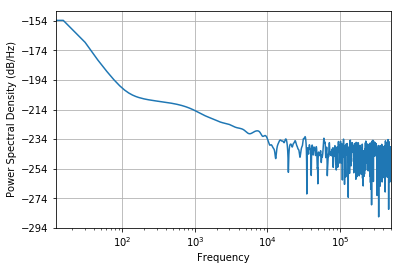

In [225]:
plt.psd(noise[-1][-1], NFFT=1<<16, noverlap=800, detrend="linear", Fs=1e6) #, scale_by_freq=True)
plt.xscale("log")
plt.xlim(12, 5e5)

In [236]:
1/(80/125e3*2)

781.2499999999999